In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams

import arcpy
import matplotlib
import pandas as pd
import numpy as np

rcParams['figure.figsize'] = 15, 10
rcParams['pdf.fonttype'] = 42
inline_rc = dict(plt.rcParams)

import arcpy

In [40]:
print(matplotlib.__version__)

2.2.3


In [5]:
gdb = "E:/Users/paulinkenbrandt/Documents/ArcGIS/Projects/LelandHarrisElevation/LHelev2.gdb"
#from arcpy.sa import Raster
arcpy.env.overwriteOutput = True
arcpy.env.workspace = gdb
hyp = {}

#elevRaster = arcpy.sa.Raster("E:/Users/paulinkenbrandt/Documents/ArcGIS/Projects/LelandHarrisElevation/ElevEx2.tif")
#myExtent = elevRaster.extent


for elev in np.arange(1456, 1457.6, 0.01):
    extnt = "250967.543055 4381750.500000 252387.543055 4383144.500000"
    outConstRaster = arcpy.sa.CreateConstantRaster(elev, "FLOAT", 1, extnt)
    outConstRaster.save("const_{}".format(int(elev*100)))
    outCutFill = arcpy.sa.CutFill("/ElevEx3","const_{}".format(int(elev*100)), 1)
    outCutFill.save("ctfll_{}".format(int(elev*100)))
    outExtractByMask = arcpy.sa.ExtractByMask("ctfll_{}".format(int(elev*100)), "Wetland_Clip")
    outExtractByMask.save("xtr_{}".format(int(elev*100)))
    summed_vol = 0
    summed_area = 0
    with arcpy.da.SearchCursor("xtr_{}".format(int(elev*100)),["AREA","VOLUME"]) as cursor:
        for row in cursor:
            if row[1] < 0:
                summed_vol = summed_vol + abs(row[1])
                summed_area = summed_area + row[0]
    hyp[elev] = [summed_area,summed_vol]


In [ ]:
arcpy.Raster()

In [4]:
elevRaster = arcpy.Raster("E:/Users/paulinkenbrandt/Documents/ArcGIS/Projects/LelandHarrisElevation/ElevEx2.tif")


TypeError: expected 1 arguments, got 2

In [ ]:
gdb = "E:/Users/paulinkenbrandt/Documents/ArcGIS/Projects/LelandHarrisElevation/LHelev2.gdb"

arcpy.env.overwriteOutput = True
arcpy.env.workspace = gdb
hyp = {}
rast = gdb+"/ElevEx3"
ElevRaster = arcpy.Raster(rast)

for elev in np.arange(1456, 1457.6, 0.01):
    outConstRaster = ElevRaster*0+elev
    outConstRaster.save("const_{}".format(int(elev*100)))
    outCutFill = arcpy.sa.CutFill("ElevEx3","const_{}".format(int(elev*100)), 1)
    outCutFill.save("xtr_{}".format(int(elev*100)))
    summed_vol = 0
    summed_area = 0
    with arcpy.da.SearchCursor("xtr_{}".format(int(elev*100)),["AREA","VOLUME"]) as cursor:
        for row in cursor:
            if row[1] < 0:
                summed_vol = summed_vol + abs(row[1])
                summed_area = summed_area + row[0]
    hyp[elev] = [summed_area,summed_vol]

In [ ]:
2075,2111

In [ ]:
outZSaT = ZonalStatisticsAsTable("zones.shp", "Classes", "valueforzone",
                                  "zonalstattblout", "NODATA", "SUM")

In [ ]:
gdb = "E:/Users/paulinkenbrandt/Documents/ArcGIS/Projects/LelandHarrisElevation/LHelev.gdb"
#from arcpy.sa import Raster
arcpy.env.overwriteOutput = True
arcpy.env.workspace = gdb
hyp = {}


for elev in np.arange(1456, 1457.6, 0.01):
    summed_vol = 0
    summed_area = 0
    with arcpy.da.SearchCursor("xtr_{}".format(int(elev*100)),["AREA","VOLUME"]) as cursor:
        for row in cursor:
            summed_vol = summed_vol + row[1]
            summed_area = summed_area + row[0]
    hyp[elev] = [summed_area,summed_vol]
hyps = pd.DataFrame.from_dict(hyp, orient='index')
hyps.columns = ['volume','area']

In [6]:
hyps = pd.DataFrame.from_dict(hyp, orient='index')
hyps.columns = ['volume','area']


In [8]:
hyps.to_csv("G:/My Drive/WORK/Leland_Harris/hypsometric_curve.csv")

In [ ]:
hyps.area

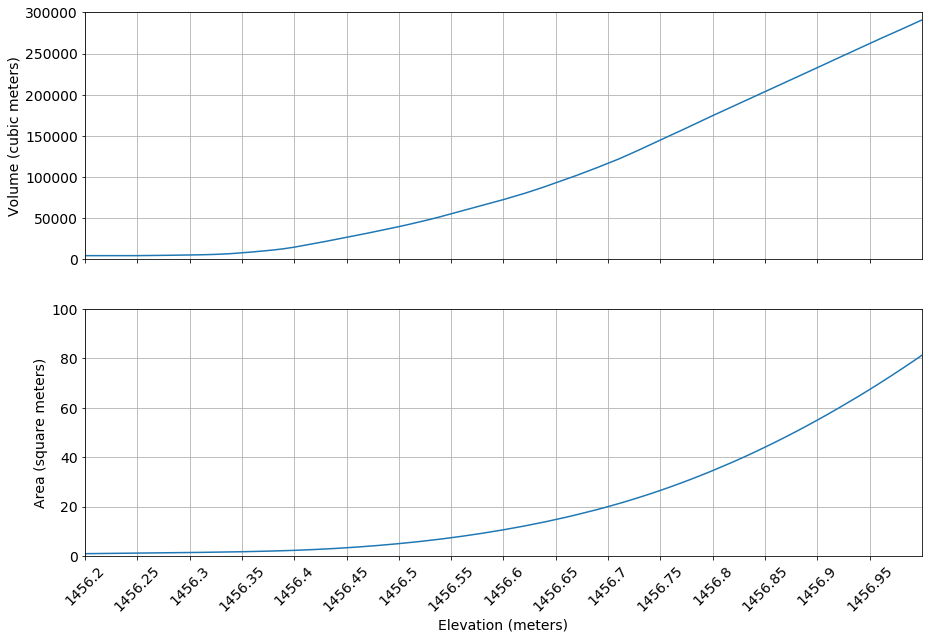

In [159]:
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 14
hyps['area_ha'] = hyps.area * 0.001

tickl = np.arange(1456.20,1457.00,0.05)
ticklabs = [str(np.round(i,2)) for i in tickl]

fig, ax = plt.subplots(2,1,sharex=True)
plt.xlim(1456.2,1457)
plt.xticks(tickl,ticklabs,rotation=45)
ax[0].plot(hyps.index.values, hyps.volume.values)
ax[1].plot(hyps.index.values, hyps.area_ha.values)
#ax[0].plot([1456.87,1456.87], [0,hyps.volume.max()])
#ax[1].plot([1456.87,1456.87], [0,hyps.area.max()])


ax[0].set_ylabel('Volume (cubic meters)')
#ax1 = ax[0].twiny()
##ax1.set_xticks(tickl,[i*3.2808 for i in tickl])
#ax1.xaxis.set_tick

ax[0].set_ylim(0,300000)
ax[1].set_ylabel('Area (square hectares)')
ax[1].set_ylim(0,100)


ax[0].grid()
ax[1].grid()
#ax[0].fill_between([1456.8,1456.9], hyps.volume.max, facecolor='blue', alpha=0.5)
#ax[1].fill_between([1456.8,1456.9], hyps.area.max, facecolor='blue', alpha=0.5)
plt.xlabel('Elevation (meters)')
plt.savefig('G:/My Drive/WORK/Leland_Harris/figures/leland_harris_hypsometric_v3.pdf')
plt.savefig('G:/My Drive/WORK/Leland_Harris/figures/leland_harris_hypsometric_v3.png')

In [161]:
hyps[(hyps['area_ha']>8)&(hyps['area_ha']<10)]

,volume,area,area_ha
1456.57,62454.0,8560.626831,8.560627
1456.58,65757.0,9204.764160,9.204764
1456.59,69198.0,9882.644653,9.882645


C:\Users\paulinkenbrandt\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone1\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


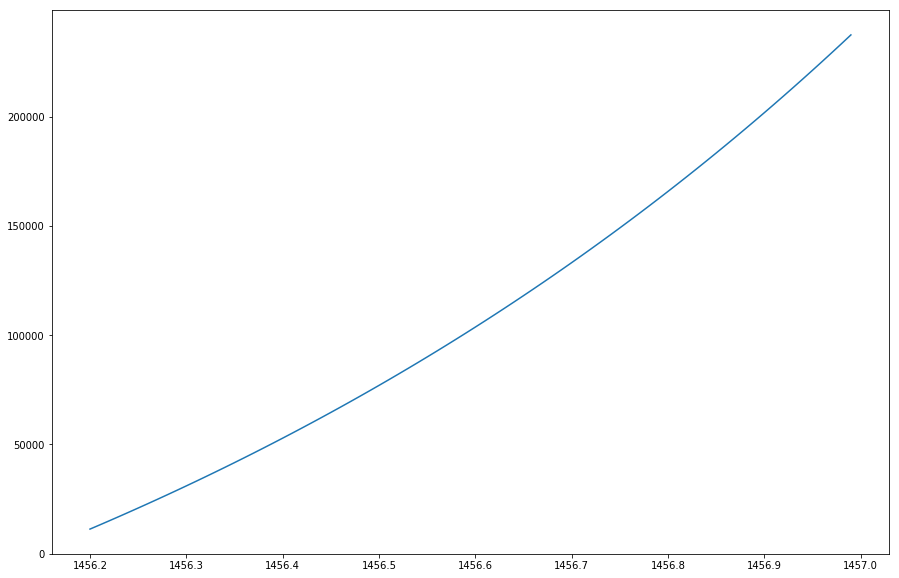

In [78]:
def func(x, a, b, c):
    return (a * np.exp(x-1456*b) + c)*10000

x = np.arange(1456.2,1457,0.01)

func(1456.35,2,0.007,3)
#[  3.89777035   0.99905682 -17.6724375 ]

plt.plot(x,[func(i,3.89777035,0.99905682,-17.6724375) for i in x])

In [73]:
import scipy
from scipy.optimize import curve_fit

[  3.89777035   0.99905682 -17.6724375 ]


C:\Users\paulinkenbrandt\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone1\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


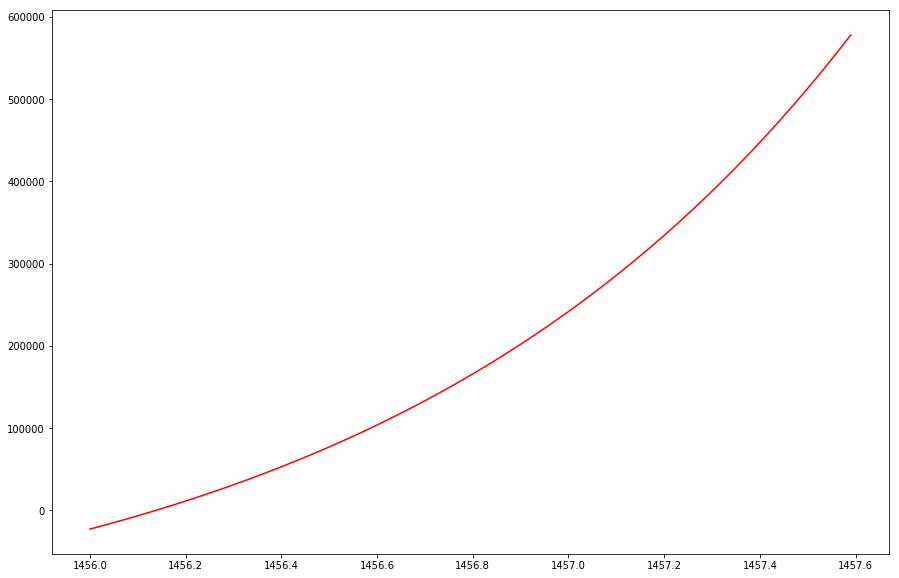

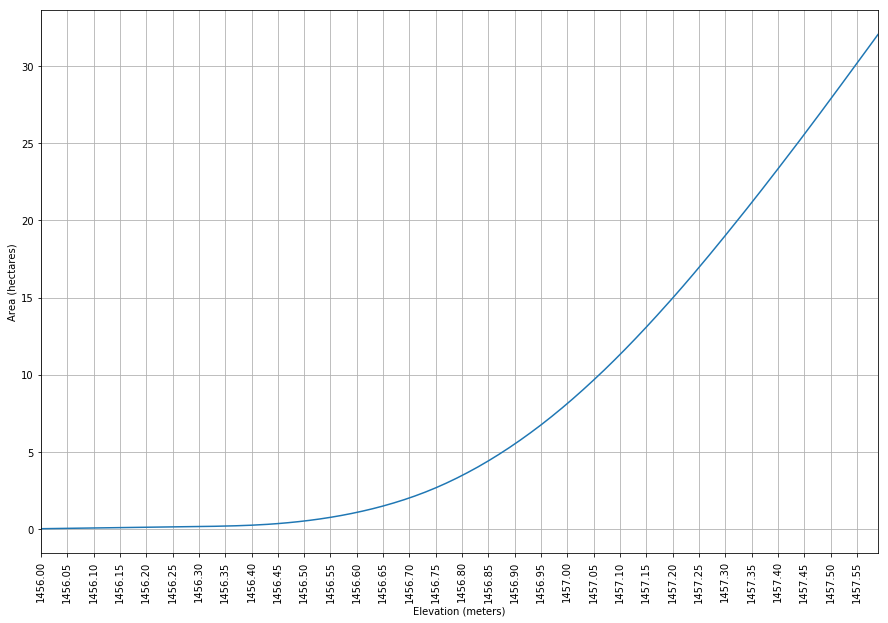

In [9]:
hyps['area_ha'] = hyps['area']*0.0001
hyps.area_ha.plot()
plt.grid()
plt.xticks(np.arange(1456,1457.6,0.05),rotation=90)

plt.ylabel('Area (hectares)')
plt.xlabel('Elevation (meters)')
plt.savefig('G:/My Drive/WORK/Leland_Harris/figures/leland_harris_area_hypsometric_v2.pdf')

In [ ]:
x

In [ ]:
volrelate(-187.9)

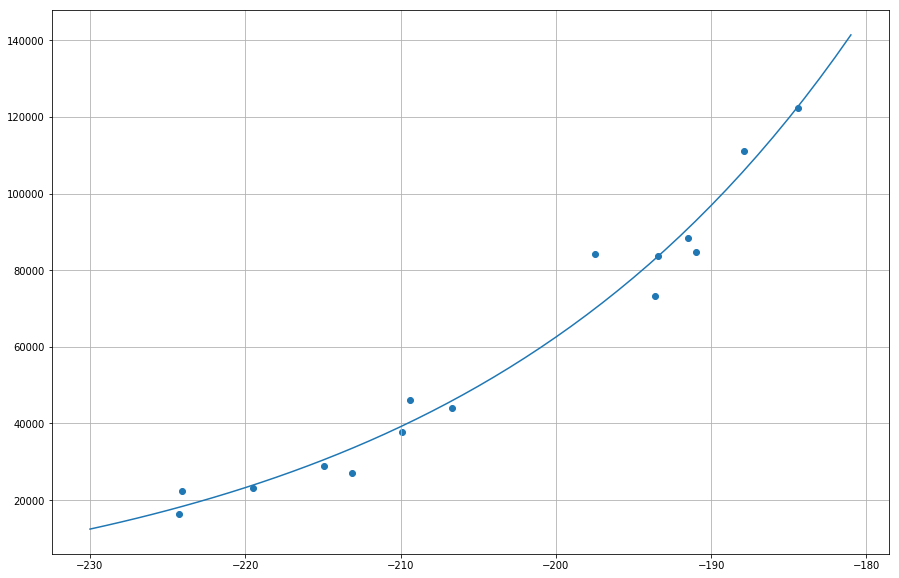

In [10]:
volume = [ 37737, 84225, 111145, 122218, 84697, 88506, 83823, 43911, 23059, 16460,
          28766, 46160, 73255, 26970, 22444]
area = [19.6, 33.1, 33.9, 33.9, 32.8, 33.6, 33.1, 20.9, 13.0, 9.1, 15.8, 22.7, 29.9, 14.5, 12.4]
DTW = [ -209.9, -197.5, -187.9, -184.4, -191.0, -191.5, -193.4, -206.7, -219.5, 
       -224.3, -214.9, -209.4, -193.6, -213.1, -224.1]

def volrelate(x):
    return (161570*np.exp(3.85*x/100.0) - 10.63)*1000
x = range(-230,-180)
y = [volrelate(i) for i in x]

def arearelate(x):
    return 67.63*x/100.0+161.89
x = range(-230,-180)
y = [volrelate(i) for i in x]

plt.plot(x,y)
plt.scatter(DTW, volume)
plt.grid()

In [ ]:
124000*.2

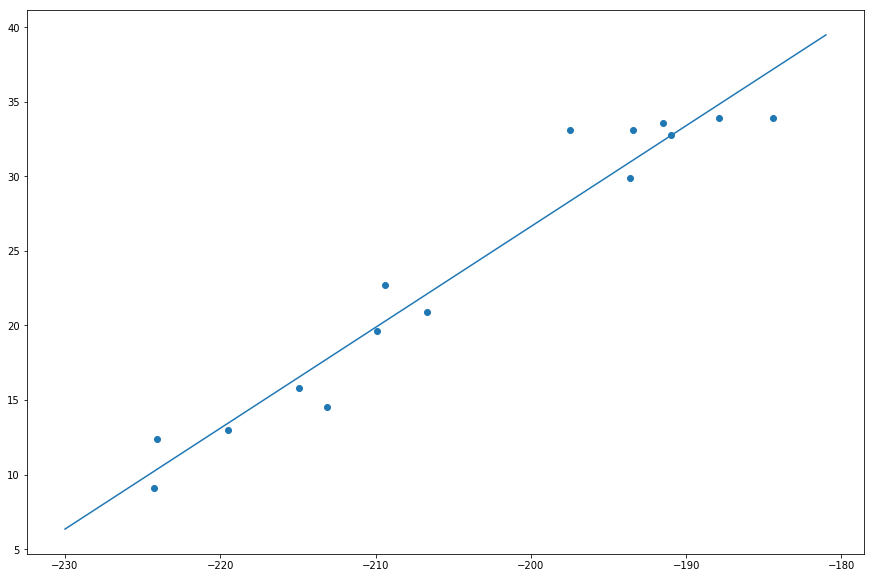

In [11]:
y = [arearelate(i) for i in x]

plt.plot(x,y)
plt.scatter(DTW, area)

In [ ]:
volrelate(-229.85)

In [ ]:
-229.85

In [ ]:
-190.37,95371,1456.66

In [ ]:
1456.66+190.37/100

In [ ]:
1458.5637+-190.37/100

In [ ]:
hyps[(hyps['volume']>1000000)&(hyps['volume']<1500000)]

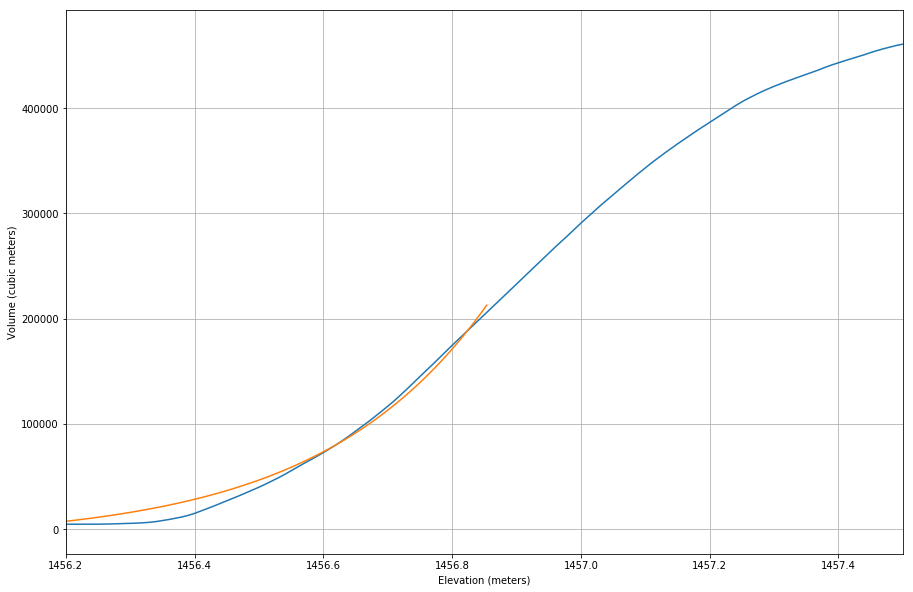

In [20]:
hyps.volume.plot()
x = range(-240,-170)
x1 = [1458.5637+i/100 for i in x]
y = [volrelate(i) for i in x]

plt.plot(x1,y)
plt.grid()
plt.ylabel('Volume (cubic meters)')
plt.xlabel('Elevation (meters)')
plt.xlim(1456.2,1457.5)
plt.savefig('G:/My Drive/WORK/Leland_Harris/figures/leland_harris_vol_hypsometric_v2.pdf')
plt.savefig('G:/My Drive/WORK/Leland_Harris/figures/leland_harris_vol_hypsometric_v2.svg')
plt.savefig('G:/My Drive/WORK/Leland_Harris/figures/leland_harris_vol_hypsometric_v2.png')

In [ ]:
hyps

In [ ]:
plt.hist(hyps.volume.diff())

In [ ]:
from scipy import optimize

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[2, 2])



In [ ]:
df

In [ ]:
for elev in np.arange(1456, 1459, 0.1):
    print("const_{}".format(int(elev*10)))